### 이상치
- 결측치와 값이 크게 차이가 나는 데이터를 뜻한다. 
- 분석 모델의 성능을 떨어뜨리거나 분석 결과에 악영향 줄수 있다. 
- 확인 후 대체, 제거
- 이상치를 확인하는 방법 여러가지 
- 일반적으로 수치형 데이터의 이상치 판단 기준에는 IQR 방식 존재
- IQR방식은 시각화 라이브러리(matplotlib)의 boxplot의 이상치 결정 방법을 그대로 사용
- IQR의 값을 구하는 방법은 Q3(제3사분위수)와 Q1(제1사분위수)의 값에 차이를 뜻
- 이상치의 경계는 (Q3 + 1.5 * IQR)보다 크거나 (Q1 - 1.5 * IQR)보다 작은 범위의 데이터를 이상치로 간주
- IQR을 이용한 방법은 많은 데이터를 이상치로 간주할 수 있는 위험이 존재
- 1.5 * IQR 규칙을 사용하기 보다는 데이터의 유형에 따라 곱하는 값(1.5)을 조정하는 것도 좋은 방법

### 실습 
1. skicit-learn의 datasets안에 있는 load_wine을 이용해서 데이터를 로드 
2. load_wine.target 데이터를 데이터프레임에 Class 컬럼에 대입
3. 0,1,2로 이루어진 target데이터를 map함수를 이용하여 class_0, class_1, class_2로 변경
4. 이상치를 확인하는 함수 생성 -> 매개변수 2개 생성 (기준이 되는 데이터프레임, 기준이되는 컬럼의 이름)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [ ]:
### 사이킷런 설치 
!pip install scikit-learn

In [18]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
## Class 새로운 컬럼에 targer 데이터를 삽입
wine['Class'] = wine_load.target
## 0,1,2로 이루어진 데이터를 class_0, class_1, class_2 변경
wine['Class'] = wine['Class'].map(
    {
        0 : 'class_0', 
        1 : 'class_1', 
        2 : 'class_2'
    }
)
wine['Class'].value_counts()

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

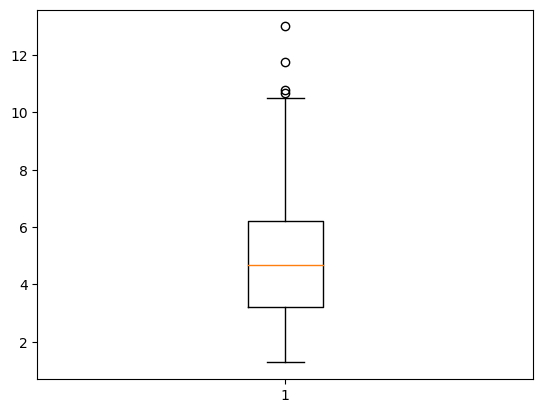

In [21]:
## matplotlib에 있는 boxplot을 이용하여 이상치를 확인
plt.boxplot(wine['color_intensity'])
plt.show()

In [22]:
## 이상치의 값들을 출력하는 함수 생성
## 매개변수 2개 데이터프레임, 컬럼의 이름
def outliers_iqr(df, col):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75])
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값 
    lower_whis = quartile_1 - (1.5 * iqr)
    upper_whis = quartile_3 + (1.5 * iqr)
    print(lower_whis, upper_whis)
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    return outliers[[col]]

In [23]:
## 이상치를 확인하는 함수를 호출
outliers = outliers_iqr(wine, 'color_intensity')
outliers

-1.2500000000000009 10.670000000000002


,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


### 이상치 정제
1. 이상치 제거 
    - 데이터의 개수가 매우 많고 이상치가 존재하는 행의 수가 전체 데이터에 비해서 많지 않은 경우에는 제거 가능
    - 이상치를 제거 -> 데이터의 개수가 줄어든다 
2. 이상치를 특정한 값으로 대체
    - 이상치의 값을 다른 값으로 대체하는 경우는 데이터 분석가에 따라 값들의 차이

In [24]:
## 이상치를 제거 
drop_outliers = wine.drop(outliers.index)
## 이상치가 삭제 확인
print("원본 데이터의 크기 :", wine.shape)
print("이상치가 제거된 데이터의 크기 :", drop_outliers.shape)

원본 데이터의 크기 : (178, 14)
이상치가 제거된 데이터의 크기 : (174, 14)


In [25]:
## 이상치를 특정한 값으로 대체
## 이상치를 결측치로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN
wine['color_intensity'].isna().sum()

4

In [26]:
## 결측치의 값을 특정한 값을 대체(color_intensity 컬럼 데이터의 평균)
wine['color_intensity'].mean()

4.908678155172414

In [27]:
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())

In [28]:
wine['color_intensity'].isna().sum()

0

In [29]:
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64